In [8]:
#import packages
import numpy as np
from matplotlib import pyplot
import time, sys
import math
import matplotlib.pyplot as plt
from matplotlib import rc
import sympy
from sympy.solvers import solve
from sympy import Symbol
from sympy import *

# Potential Flow 
The Navier-Stokes equations are notoriously difficult to solve, with very few analytical solutions existing. This is due to the presence of nonlinear terms (namely, the convective acceleration terms). On the other hand, irrotational, incompressible, and inviscid flows are linear, which are the conditions that are assumed when studying **potential flow**. By definition, irrotational flow satisfies
$$\nabla \times \mathbf{u} = 0 $$
where $\mathbf{u}$ is the velocity vector of the fluid. We define the *velocity potential* $\phi$ as
$$\mathbf{u} = \nabla \phi = \frac{\partial \phi}{\partial x} + \frac{\partial \phi}{\partial y}$$
If there is a vector $\boldsymbol{\psi}$ that satisfies
$$u = \nabla \times \boldsymbol{\psi} $$
then the fluid is **automatically incompressible**. For 2D flow, $\boldsymbol{\psi} = \psi \mathbf{k}$, where $\psi$ is the *streamfunction*. It is imperative to understand that the velocity potential $\phi$ only exists if the flow is irrotational—viscous flows are inherently rotational, so we must limit our study to inviscid flow. In Cartesian coordinates, the velocity potential and streamfunction have the following relationships to the velocity components:
$$u = \frac{\partial \phi}{\partial x} = \frac{\partial \psi}{\partial y} \text{ and } v = \frac{\partial \phi}{\partial y} = -\frac{\partial \psi}{\partial x} $$
From the continuity equation,
$$\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = \nabla^2 \phi $$
Because the continuity equation equates to 0, the velocity potential automatically satisfies Laplace's equation:
$$\nabla^2 \phi = 0$$
The streamfunction also satisfies Laplace's equation by applying the irrotational condition.
$$\nabla \times \mathbf{u} = \left(\frac{\partial v}{\partial x} - \frac{\partial u}{\partial y} \right)\mathbf{k} = \left( -\frac{\partial^2 \psi}{\partial x^2} - \frac{\partial^2 \psi}{\partial y^2}\right)\mathbf{k} = -\nabla^2 \psi \mathbf{k} = 0$$
$$\Longrightarrow \nabla^2 \psi = 0$$
Since Laplace's equation is linear, we can apply the principle of superposition when solving problems.

# Uniform Flow
For uniform flow, the velocity, streamfunction, and velocity potential components are
$$u = U_\infty\cos(\theta), \quad v = U_\infty\sin(\theta), \quad \psi = U_\infty\left(y\cos\theta - x\sin\theta \right), \quad \phi = U_\infty\left(x\cos\theta + y\sin\theta\right)  $$
First, we create a finite-difference mesh (or grid) where $0 \leq x \leq h$ and $0 \leq y \leq h$. For a total of $N$ lines in both the horizontal and vertical directions, the spacing between each node is
$$\Delta x = \Delta y = \frac{h}{N - 1} $$
In Python, we can create arrays that store the coordinates of the nodes using linspace(). We will also generate the mesh onto a figure to verify that everything is working.

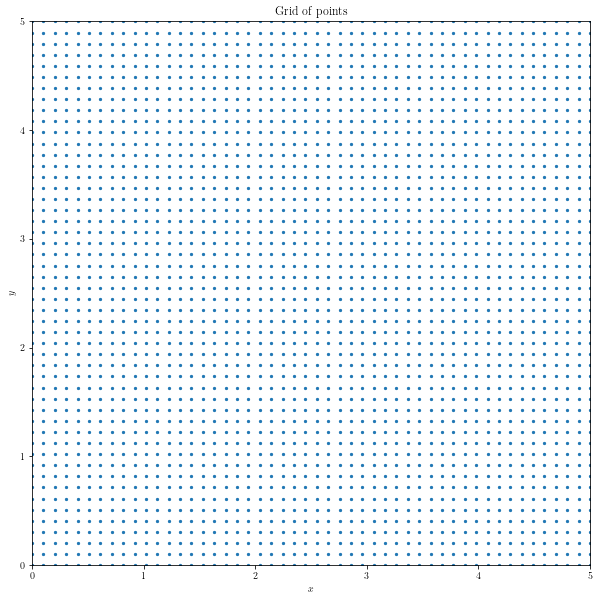

In [62]:
#Set up the grid 
%matplotlib inline
N = 50;                                        #number of lines in each direction
x_lower, x_upper = 0, 5                        #x limit boundaries
y_lower, y_upper = 0, 5                        #y limit boundaries
x_grid = np.linspace(x_lower, x_upper, N)      #points along the grid in the x direction
y_grid = np.linspace(y_lower, y_upper, N)      #points along the grid in the y direction
x_dir, y_dir = np.meshgrid(x_grid, y_grid)     #create the grid
L = 10
H = 10

#Plot data
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(L,H))
plt.title(r'Grid of points')
plt.xlim(x_lower, x_upper)
plt.ylim(y_lower, y_upper)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.scatter(x_dir, y_dir, s=5)

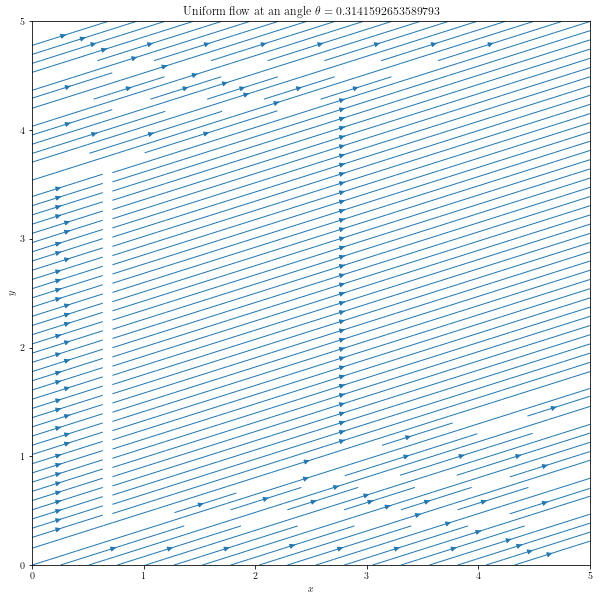

In [103]:
U = 10               #speed of uniform flow in [m/s]
θ = math.pi/10       #angle of flow with respect to x axis in [radians]
u = np.zeros((N,N))  #array that stores u component at each point
v = np.zeros((N,N))  #array that stores v component at each point
for k in range(N):
    for j in range(N):
        #Populate grid with the same values (uniform flow does not vary)
        u[k][j] = U * cos(θ)
        v[k][j] = U * sin(θ)

#Plot data
plt.figure(figsize=(L,H))
plt.title(r'Uniform flow at an angle $\theta = {}$'.format(θ))
plt.xlim(x_lower, x_upper)
plt.ylim(y_lower, y_upper)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.streamplot(x_dir, y_dir, u, v, density=2, linewidth=1);  #semicolon suppresses line from being output

# Source/Sink
A source (or sink) is a point where a fluid flows radially outward or inward. Because of the nature of this flow, it is convenient to convert to cylindrical coordinates when generating streamlines. The velocity components, streamfunction, and velocity potential are
$$u_r = \frac{Q}{2\pi r}, \quad u_\theta = 0, \quad \psi = \frac{Q\theta}{2\pi},\quad \phi = \frac{Q}{2\pi}\ln r $$
where $Q$ is the source strength (it is also the volumetric flow rate from the source/sink). The fact that $u_\theta = 0$ is due to the fact that the streamlines are straight and do not rotate. However, computationally expressing the velocity components in Cartesian coordinates is desirable:
$$u = \frac{Q}{2\pi}\frac{x - x_{source}}{(x - x_{source})^2 + (y - y_{source})^2}, \quad v = \frac{Q}{2\pi}\frac{y - y_{source}}{(x - x_{source})^2 + (y - y_{source})^2} $$

In [98]:
source_x, source_y = 2.5, 2.5                    #coordinates of the source
Q = 10                                           #strength of the source in [m^3/s]
x_low, x_high = source_x - 2.5, source_x + 2.5   #x limits
y_low, y_high = source_y - 2.5, source_y + 2.5   #y limits

u_source = np.zeros((N,N))                       #array to store u component of velocity
v_source = np.zeros((N,N))                       #array to store v component of velocity

for k in range(N):
    for j in range(N):
        u_source[k][j] = Q / (2 * math.pi) * (x_dir[k][j] - source_x)/((x_dir[k][j] - source_x)**2 + (y_dir[k][j] - source_y)**2)
        v_source[k][j] = Q / (2 * math.pi) * (y_dir[k][j] - source_y)/((x_dir[k][j] - source_x)**2 + (y_dir[k][j] - source_y)**2)

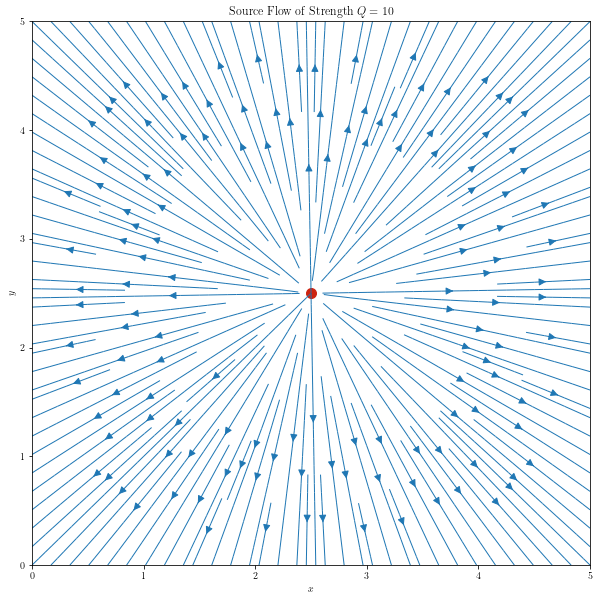

In [100]:
#Plot data
plt.figure(figsize=(L,H))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim(x_low, x_high)
plt.ylim(y_low, y_high)
plt.title(r'Source Flow of Strength $Q = {}$'.format(Q))
plt.streamplot(x_dir, y_dir, u_source, v_source, arrowsize=1.5, density = 2, linewidth = 1.0)
plt.scatter(source_x, source_y, s=100, color='#CD2310');  #semicolon suppresses line from being output

## Sink
A sink has the same velocity components as the source, but there is one key distinction: the source strength $Q$ is *negative* for a sink.

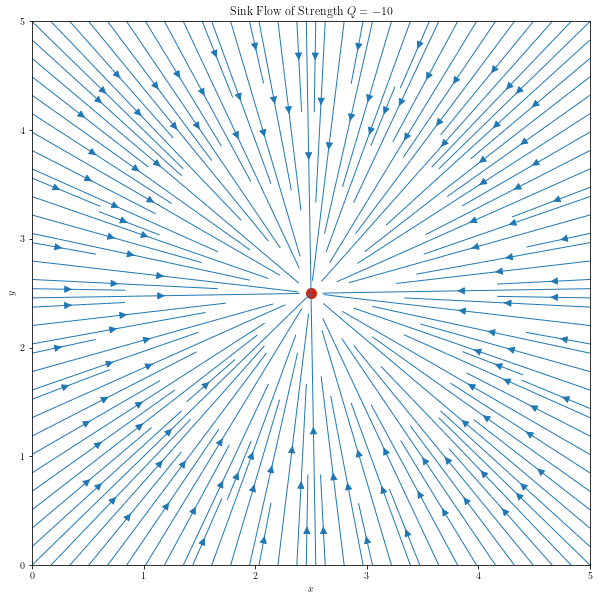

In [105]:
sink_x, sink_y = 2.5, 2.5         #coordinates of the sink
Q_sink = -10                            #strength of sink in [m^3/s]

u_sink = np.zeros((N,N))          #array to store u component of velocity
v_sink = np.zeros((N,N))          #array to store v component of velocity

for k in range(N):
    for j in range(N):
        u_sink[k][j] = Q_sink / (2 * math.pi) * (x_dir[k][j] - source_x)/((x_dir[k][j] - source_x)**2 + (y_dir[k][j] - source_y)**2)
        v_sink[k][j] = Q_sink / (2 * math.pi) * (y_dir[k][j] - source_y)/((x_dir[k][j] - source_x)**2 + (y_dir[k][j] - source_y)**2)

#Plot data
plt.figure(figsize=(L,H))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim(x_low, x_high)
plt.ylim(y_low, y_high)
plt.title(r'Sink Flow of Strength $Q = {}$'.format(Q_sink))
plt.streamplot(x_dir, y_dir, u_sink, v_sink, arrowsize=1.5, density = 2, linewidth = 1.0)
plt.scatter(sink_x, sink_y, s=100, color='#CD2310');  #semicolon suppresses line from being output

# Point Vortex
Similar to the previous two potential flows, a point vortex is also a singularity (viz., the core of the point vortex has infinite velocity). The velocity, streamfunction, and velocity potential of this flow are
$$u_r = 0, \quad u_\theta = \frac{\Gamma}{2\pi r}, \quad \psi = -\frac{\Gamma}{2\pi}\ln r, \quad \phi = \frac{\Gamma}{2\pi}\theta, $$
In Cartesian coordinates, the velocity components $u$ and $v$ are
$$u = -\frac{\Gamma}{2\pi}\frac{\left(y - y_{vortex} \right)}{\left(x - x_{vortex} \right)^2 + \left(y - y_{vortex} \right)^2}, \quad v = \frac{\Gamma}{2\pi}\frac{\left(x - x_{vortex} \right)^2}{\left(x - x_{vortex} \right)^2 + \left(y - y_{vortex} \right)^2} $$

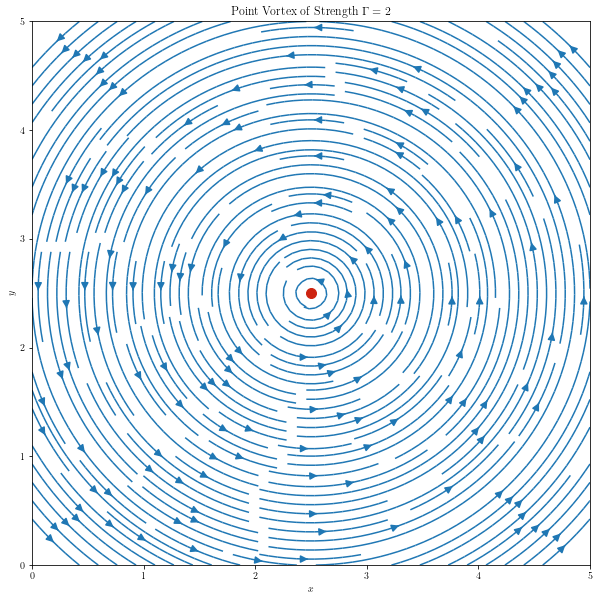

In [109]:
point_x, point_y = 2.5, 2.5           #coordinates of the point vortex
Γ = 2                                 #strength of vortex in [m^3/s]

u_point = np.zeros((N,N))             #array to store u component of velocity
v_point = np.zeros((N,N))             #array to store v component of velocity

for k in range(N):
    for j in range(N):
        u_point[k][j] = -Γ/(2 * math.pi) * (y_dir[k][j] - point_y)/((x_dir[k][j] - point_x)**2 + (y_dir[k][j] - point_y)**2)
        v_point[k][j] = Γ/(2 * math.pi) * (x_dir[k][j] - point_x)/((x_dir[k][j] - point_x)**2 + (y_dir[k][j] - point_y)**2)
        
#Plot data
plt.figure(figsize=(L,H))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim(x_low, x_high)
plt.ylim(y_low, y_high)
plt.title(r'Point Vortex of Strength $\Gamma = {}$'.format(Γ))
plt.streamplot(x_dir, y_dir, u_point, v_point, arrowsize=1.5, density = 2, linewidth = 1.5)
plt.scatter(point_x, point_y, s=100, color='#CD2310');  #semicolon suppresses line from being output